In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
'''
# Predicting heart disease using machine learning

## Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. `age` - age in years
2. `sex` - (1 = male; 0 = female)
3. `cp` - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. `trestbps` - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. `chol` - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. `fbs` - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. `restecg` - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. `thalach` - maximum heart rate achieved
9. `exang` - exercise induced angina (1 = yes; 0 = no)
10. `oldpeak` - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. `slope` - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. `ca` - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. `thal` - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. `target` - have disease or not (1=yes, 0=no) (= the predicted attribute)

'''

"\n# Predicting heart disease using machine learning\n\n## Problem Definition\n\nIn a statement,\n> Given clinical parameters about a patient, can we predict whether or not they have heart disease?\n\n## Features\n\nThis is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).\n\n**Create data dictionary**\n\n1. `age` - age in years\n2. `sex` - (1 = male; 0 = female)\n3. `cp` - chest pain type\n    * 0: Typical angina: chest pain related decrease blood supply to the heart\n    * 1: Atypical angina: chest pain not related to heart\n    * 2: Non-anginal pain: typically esophageal spasms (non heart related)\n    * 3: Asymptomatic: chest pain not showing signs of disease\n4. `trestbps` - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern\n5.

In [4]:
data1=pd.read_csv('F:\\Predicting heart disease\\Predicting heart disease\\Predicting heart disease.csv')

In [5]:
data1.head() #starting 4 columns of our data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#MISSING VALUES


data1.apply(lambda x: sum(x.isnull()))

# looks like our dataset do not have any missing value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# Statistical Summary of Continuous Variables:

data1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# checking if our dataset contain categorical variables

categorical = data1.dtypes[data1.dtypes == "object"].index

print(categorical)

Index([], dtype='object')


In [10]:
# no patient who has HD vs those donno have HD
#(0=NO,1=YES)
data1['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [11]:
# proportion of patient who has HD vs those donno have HD

data1['target'].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [12]:
# ABSOLUTE NUMBER OF MALE PATIENT WHO HAS HD
data1['target'][data1['sex']==1].value_counts()

0    114
1     93
Name: target, dtype: int64

In [13]:
# PROPORTION OF MALE PATIENT WHO HAS HD
data1['target'][data1['sex']==1].value_counts(normalize=True)

0    0.550725
1    0.449275
Name: target, dtype: float64

In [14]:
# ABSOLUTE NUMBER OF FEMALE PATIENT WHO HAS HD
data1['target'][data1['sex']==0].value_counts()

1    72
0    24
Name: target, dtype: int64

In [15]:
# PROPORTION OF FEMALE PATIENT WHO HAS HD
data1['target'][data1['sex']==0].value_counts(normalize=True)

1    0.75
0    0.25
Name: target, dtype: float64

In [16]:
data1.groupby(["sex","target"]).size().unstack()
# (1=male,0=female)

target,0,1
sex,,
0,24,72
1,114,93


In [17]:
data1.pivot_table(index="sex", values=["target"], aggfunc=np.mean)

,target
sex,
0,0.750000
1,0.449275


In [18]:
# IT LOOKS LIKE FEMALES ARE MORE PRONE TO HD THAN MALE

# univariate distribution

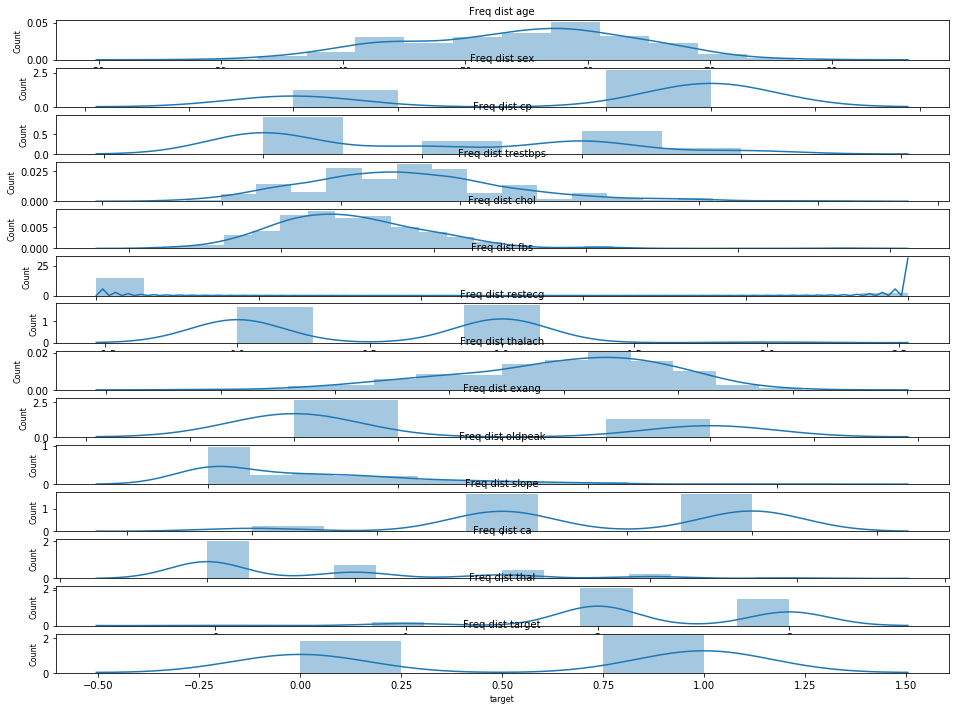

In [24]:
predicotrs= ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']

fig, ax = plt.subplots(len(predicotrs), figsize=(16,12))

for i, col_val in enumerate(predicotrs):

    sns.distplot(data1[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
plt.show()

<Figure size 1008x1008 with 0 Axes>

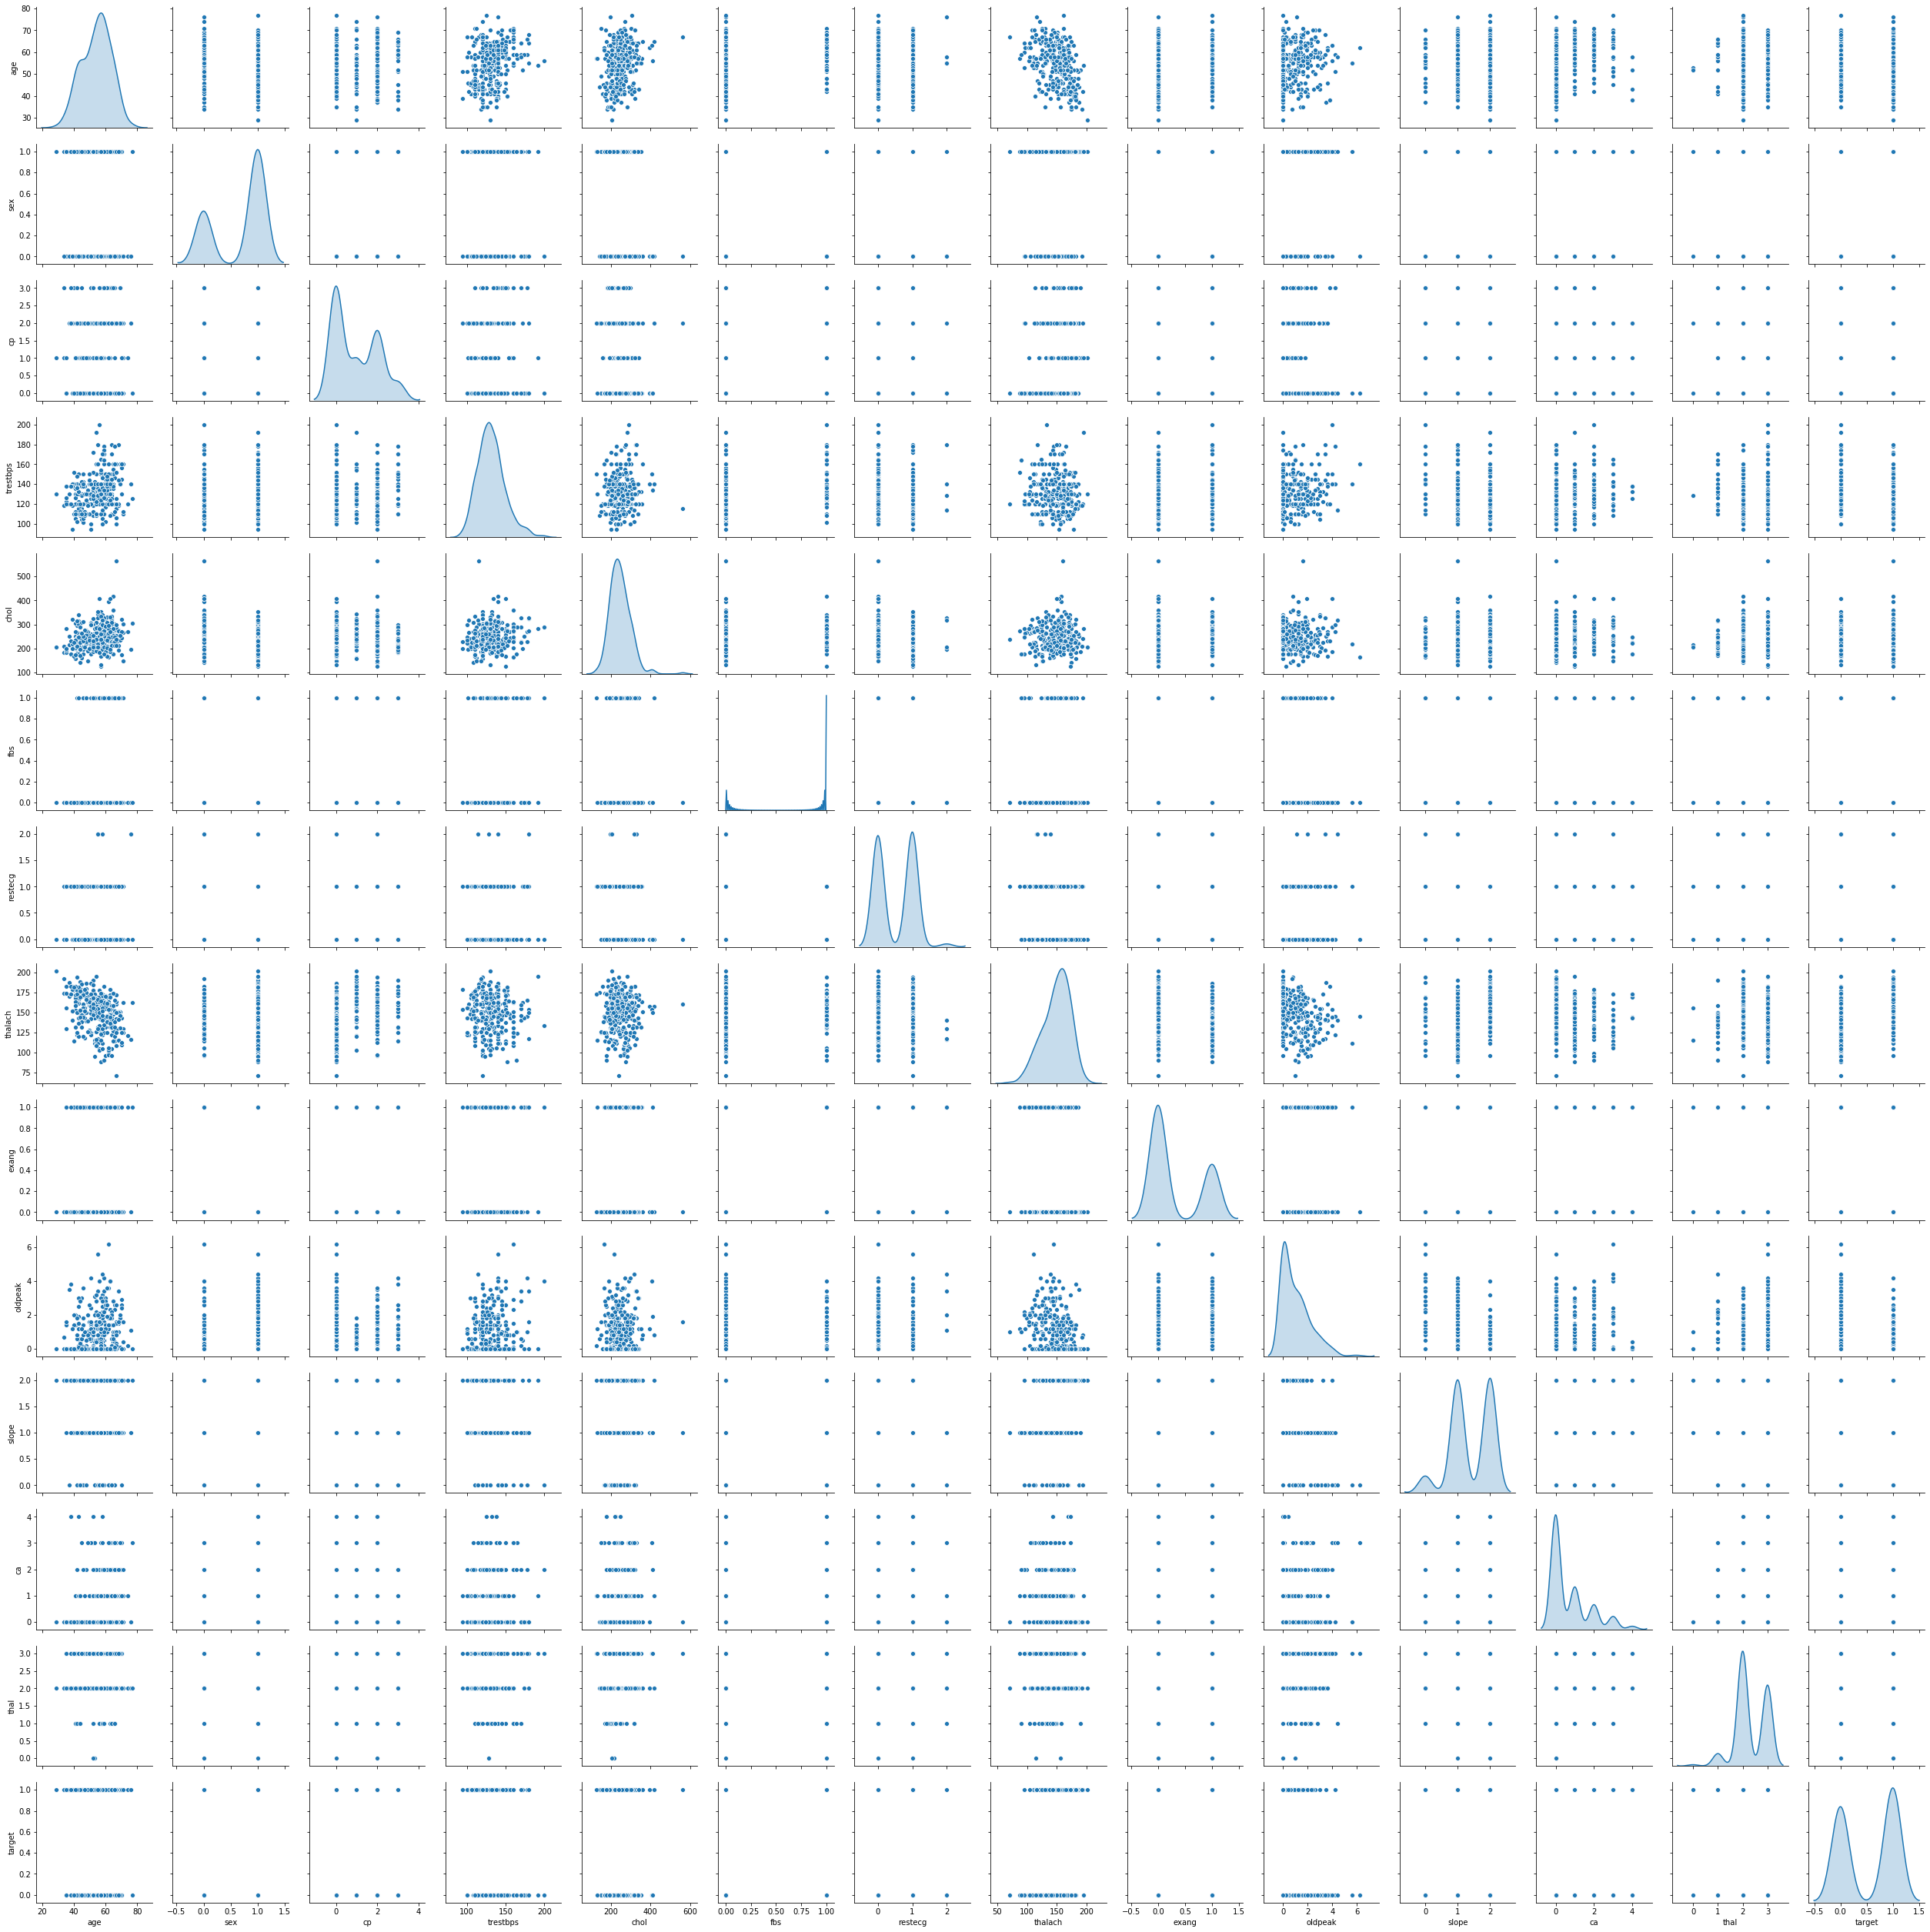

In [20]:
#Bivariate distribution
plt.figure(figsize=(14, 14))
sns.pairplot(data1, diag_kind='kde');

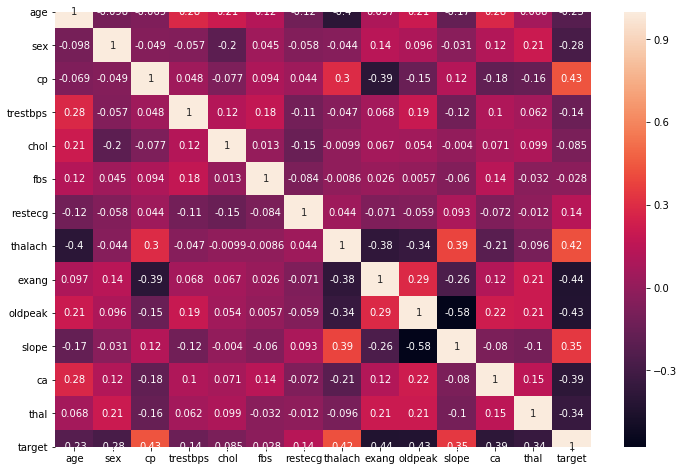

In [25]:
#heatmap

plt.figure(figsize=(12, 8))
corr = data1.corr()
sns.heatmap(corr, xticklabels = datacorr.columns.values,yticklabels = datacorr.columns.values,annot = True)